# Setup 

In [1]:
# define llm 
llm_config = {"model" : "gpt-4-turbo"}

# Define a code executor 

In [40]:
from autogen.coding import LocalCommandLineCodeExecutor

In [41]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir = "coding"
)

# Agents 

In [42]:
from autogen import ConversableAgent, AssistantAgent

## Agent: Code executor 

In [44]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE' ."
)

## Agent: Code writing 

In [45]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [46]:
code_writer_agent_system_message = code_writer_agent.system_message

In [47]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

# Task
- Ask the two agnets to collaborate on a stock analysis task 

In [48]:
import datetime 

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
    "Create a plot showing stock gain YTD for NVDA and TLSA. "\
    "Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png."

In [49]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-27. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

First, we need to collect stock price data for NVIDIA Corporation (NVDA) and Tesla, Inc. (TSLA) from the beginning of the year until today (2024-08-27). We'll use the `yfinance` library to download the stock data and `matplotlib` to plot the YTD gains for both stocks.

Here is the Python code to fetch data and plot the graph:

```python
# filename: plot_stock_ytd_gains.py

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_data(stock_symbol, start_date, end_date):
    """ Fetch stock data from Yahoo Finance. """
    return yf.download(stock_symbol, start=start_date, end=end_date)

def plot_stock_gains(st

In [50]:
import os
print(os.getcwd())

d:\MY DOC\AI EXPLORE\[2] NLP\AutoGen


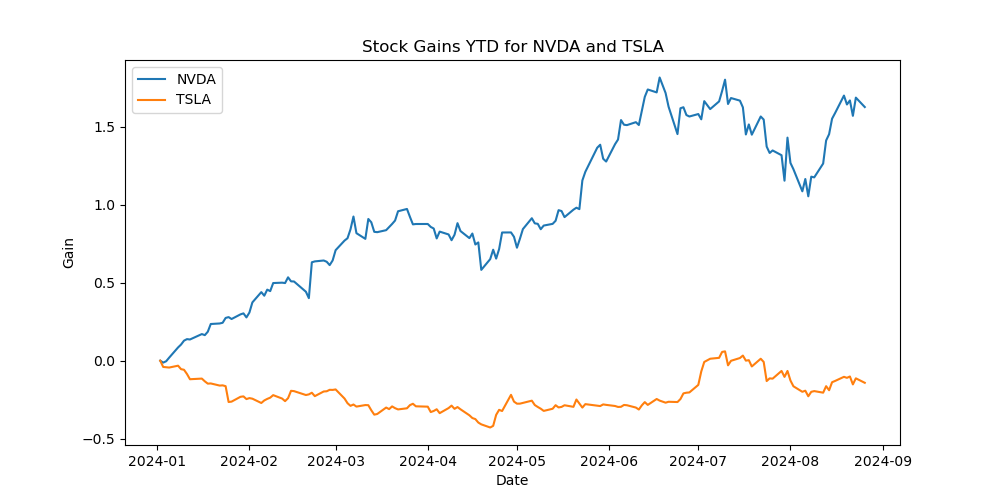

In [61]:
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))


# User Defined Functions

In [53]:
def get_stock_prices(stock_symbols, start_date, end_date):
    '''
    Get the stock prices for the given stock symbols between the start and end dates 
    
    Args:
        stock_symbols (str or list): The stock symbols to get the prices for.
        start_date (str): The start date in the format 'YYYY - MM - DD'.
        end_date (str): The end date in the format 'YYYY - MM - DD'. 
        
    Returns:
        pandas.DateFrame: the stock prices for the given stock symbols indexed by date, with one colun per stock symbol.
    '''
    
    import yfinance
    
    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [54]:
def plot_stock_prices(stock_prices, filename):
    ''' 
    Plot the stock prices for the given stock symbols.
    
    Args:
        stock_prices (pandas.DataFrame): The stock prices for the given stock symbols.
    '''
    
    import matplotlib.pyplot as plt 
    
    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
        )
        
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

# New executor with user defined functions

In [55]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [56]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

# Update the agent with new system message 

In [57]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [58]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=llm_config,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINARE'."
)

# Start

In [59]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create a plot."
    "Make sure the code is in markdown code block and save the fogure to a file stock_prices_YTD_plot.png"
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-27.Download the stock prices YTD for NVDA and TSLA and create a plot.Make sure the code is in markdown code block and save the fogure to a file stock_prices_YTD_plot.png

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To complete the task of downloading Year-To-Date (YTD) stock prices for NVDA and TSLA and plotting them to a file named "stock_prices_YTD_plot.png", we will follow these steps:

1. Import the required functions from the `functions` module.
2. Specify the start and end dates for YTD. Since YTD means from the beginning of the current year until today, the start date will be '2024-01-01' and the end date '2024-08-27'.
3. Use the `get_stock_prices` function to fetch the stock prices for NVDA and TSLA between these dates.
4. Plot these stock prices using the `plot_stock_prices` function and save the figure to "stock_prices_YTD_plot.png".


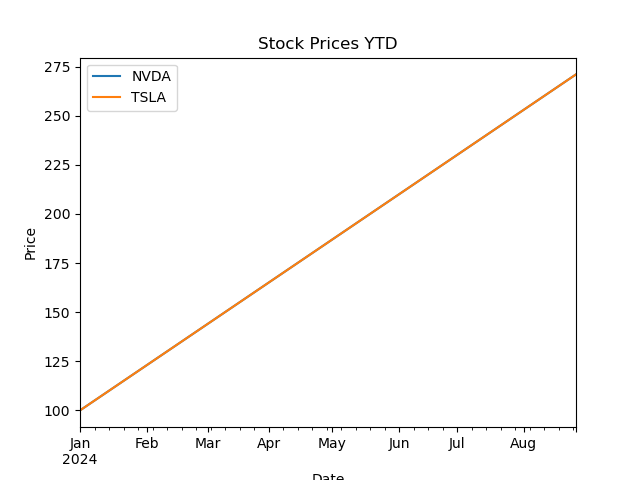

In [60]:
Image(os.path.join("coding", "stock_prices_YTD_plot.png"))